In [1]:
from tensorflow import keras as keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load training and test i
# mages (x), and their respective classified labels (y).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 10 training labels as digits:
 [5 0 4 1 9 2 1 3 1 4]



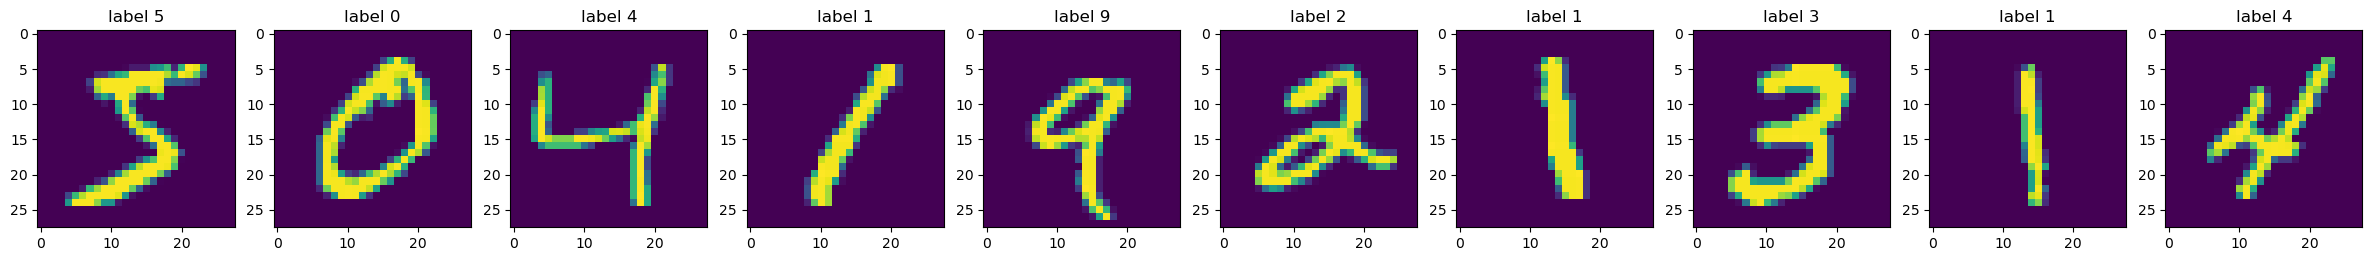

In [4]:
# Investigate the data

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("First 10 training labels as digits:\n", y_train[:10])
print("")

# Plot the first 10 images
### STUDENT CODE HERE ###
fig=plt.figure(figsize=(30,180))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title('label {}'.format(y_train[i]))
    plt.imshow(x_train[i].reshape([28,28]))
### END STUDENT CODE ###

In [5]:
# Pre-processing of data

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("reshaped training data format: ", x_train.shape) # -- 60000 images, now flat arrays of 28*28 long

# one-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 10 training lables as one-hot encoded vectors:\n", y_train[:10])

reshaped training data format:  (60000, 784)
First 10 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [6]:
# Build the network
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

model = Sequential()

# The input layer requires the special input_shape parameter, which should equal the shape of our training data.
# The output layer must be the same size as the (one-hot encoded) labels.
# Choose a non-linear activation function such as a sigmoid, or relu.
# For classification purposes, where the outputs are normalized 'probabilities' between the classes,
#  one typically uses the softmax activation function for the last layer.

### STUDENT CODE HERE ###
### --> add Dense (fully connected) layers to the model to connect input to output, using model.add().
#units=number of nodes
#activation=activation function
model.add(Dense(units=32,activation='sigmoid',input_shape=(image_vector_size,)))#training
#the input_shape is necessary only on the first layer, because it is the only that its getting the input
#the other layers are taking the outputs of the previous ones as inputs
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=num_classes,activation='softmax'))#output
### END STUDENT CODE ###

# Print model summary. Shows network layout, and # free parameters (weights + biases) to adapt while learning.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 30)                990       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 26,420
Trainable params: 26,420
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile the model

# A good loss function for probability classification that works well with softmax is the 'categorical crossentropy'.
#  It's a function of the difference between the predicted y (from running the image through the network),
#  and the actual label y that we get from the dataset. The larger the loss, the worst our network is performing.
# A good optimizer is the stochastic gradient descent (sgd) or adam.

### STUDENT CODE HERE ###
### --> Call model.compile with the right arguments.
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
### END STUDENT CODE ###

313/313 [==============================] - 1s 1ms/step


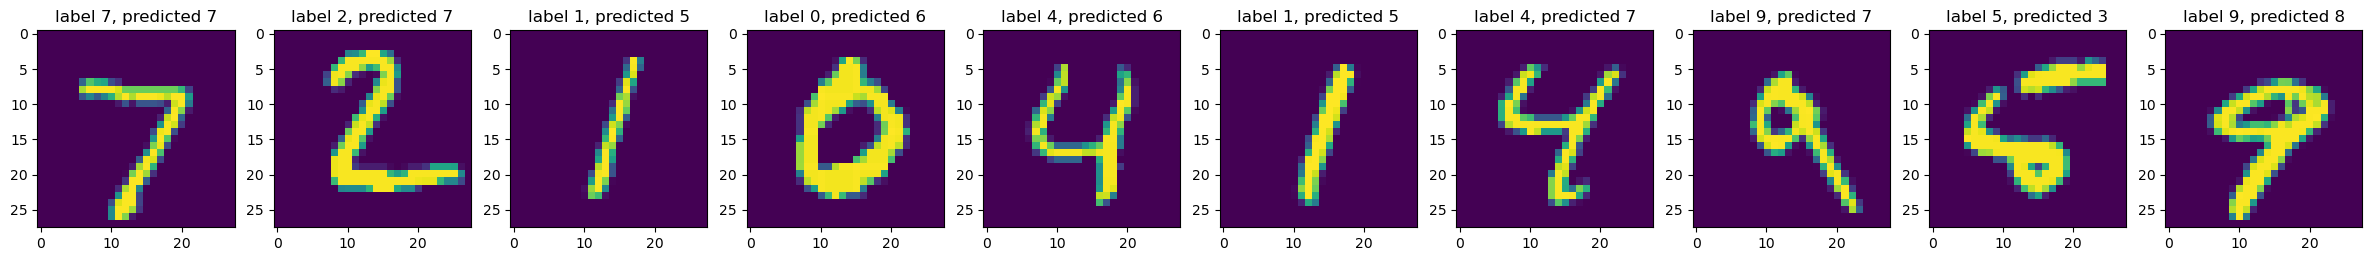

In [7]:
y_pred_test = model.predict(x_test)#call model.predict() on the test images, and show ù#the predictions of the untrained model for the first 10 images

### STUDENT CODE HERE ###
fig=plt.figure(figsize=(30,180))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title('label {}, predicted {}'.format(np.argmax(y_test[i]),np.argmax(y_pred_test[i])))
    #### Note that the y_test and y_pred are still one-hot encoded, so you need to get
    ### the index of the maximum entry to find the corresponding predicted 'number'.
    plt.imshow(x_test[i].reshape([28,28]))
### END STUDENT CODE ###



In [8]:
# Train the model.

# BATCH_SIZE defines how many images to process at once.
# EPOCHS defines how often to run over the total data (60000 images)
# (Note that a small part of the train data is internally split off for independent validation of the metrics)

### STUDENT CODE HERE ###
### --> Edit the parameters below to obtain a better accuracy in the training.

BATCH_SIZE = 32
EPOCHS = 13

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=.1)

Epoch 1/13
1688/1688 [==============================] - 5s 3ms/step - loss: 1.0681 - accuracy: 0.6925 - val_loss: 0.6297 - val_accuracy: 0.8228
Epoch 2/13
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6027 - accuracy: 0.8212 - val_loss: 0.5207 - val_accuracy: 0.8558
Epoch 3/13
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5409 - accuracy: 0.8368 - val_loss: 0.4646 - val_accuracy: 0.8628
Epoch 4/13
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5083 - accuracy: 0.8461 - val_loss: 0.3997 - val_accuracy: 0.8840
Epoch 5/13
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4867 - accuracy: 0.8515 - val_loss: 0.3899 - val_accuracy: 0.8870
Epoch 6/13
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4703 - accuracy: 0.8576 - val_loss: 0.4020 - val_accuracy: 0.8820
Epoch 7/13
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4586 - accuracy: 0.8578 - val_loss: 0.4006 - val_accuracy:

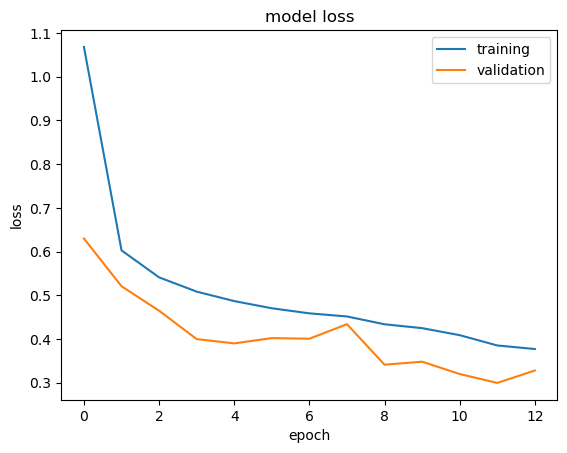

In [9]:
# Plot the progression of the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

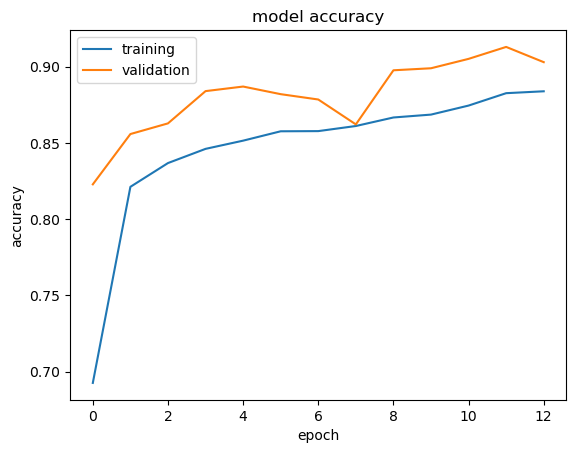

In [10]:
# Plot the progression of the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Test loss: 0.39
Test accuracy: 0.88
313/313 [==============================] - 1s 2ms/step


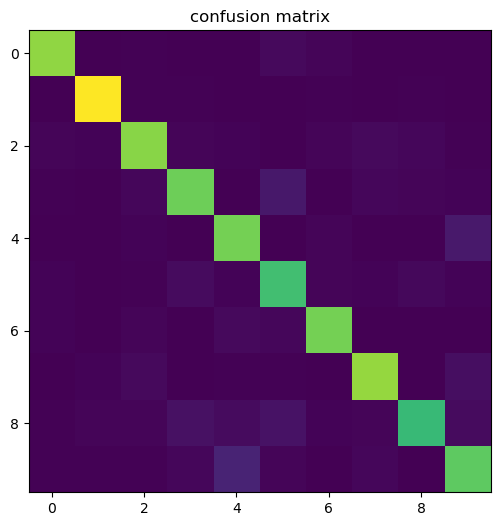

In [12]:
# Evaluate model on test data - how often does the network predict the right label after training?

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make a confusion matrix to see which numbers are difficult to disentangle
### --> Now predict again the labels for the test images, but after proper training.
y_pred_test = model.predict(x_test) # obtain one-hot encoded predictions for the x_test images

### Note that the y_test and y_pred are still one-hot encoded, so you need to get
### the index of the maximum entry to find the corresponding predicted 'number'.
y_test_index      = [ np.argmax(i) for i in y_test ] # actual number known labels
y_pred_test_index = [ np.argmax(i) for i in y_pred_test ] # actual number predictions
y_pred_test_proba = [ y_pred_test[i][ y_pred_test_index[i] ] for i in range(len(y_test_index)) ] # probabilities to be correct

from sklearn.metrics import confusion_matrix
### STUDENT CODE HERE ###

###  Build a confusion matrix to show which labels we often confuse with what.
plt.figure(figsize=(7,6))
plt.title('confusion matrix')
plt.imshow(confusion_matrix(y_test_index,y_pred_test_index))
#look at the solutions to add legends, labels and so on
### END STUDENT CODE ###

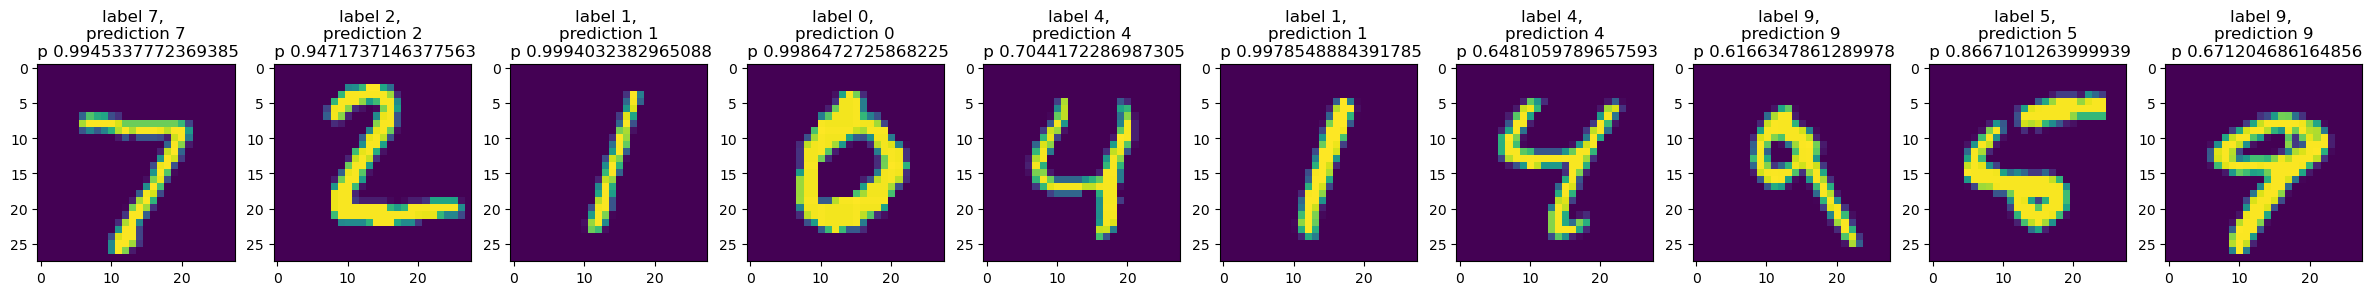

In [13]:
# Show some predicted labels and their probabilities to be correct

### STUDENT CODE HERE ###
### --> Now show some hand-written digit images from the test sample, 
###  their corresponding true label, their predicted label from your network,
###  and the probability associated with that prediction.
fig=plt.figure(figsize=(30,180))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title('label {}, \nprediction {}\n p {}'.format(y_test_index[i],y_test_index[i],y_pred_test_proba[i]))
    plt.imshow(x_test[i].reshape([28,28]))
### END STUDENT CODE ###
#general comment: the training and thest data set are two different ones! pay attention when using them